In [1]:
!pip install kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"prafullnayan","key":"0bcabf96ae2799c53bdb34294b627af3"}'}

# Importing Dataset

In [4]:
!echo '{"username":"prafullnayan","key":"0bcabf96ae2799c53bdb34294b627af3"}' > /root/.kaggle/kaggle.json
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia


100% 2.29G/2.29G [00:30<00:00, 45.0MB/s]
100% 2.29G/2.29G [00:30<00:00, 81.1MB/s]


# Extracting from zipfiles

In [5]:
from zipfile import ZipFile
file_name='chest-xray-pneumonia.zip'

with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('done')

done


In [9]:
import pandas as pd

In [10]:
import os

In [11]:
data_dir="/content/chest_xray/chest_xray"
os.listdir(data_dir)

['.DS_Store', 'test', 'val', 'train']

# setting Path

In [12]:
train_path=data_dir+'/train'
test_path=data_dir+'/test'
val_path=data_dir+'/val'
print(os.listdir(train_path))
print(os.listdir(test_path))
print(os.listdir(val_path))

['NORMAL', 'PNEUMONIA', '.DS_Store']
['NORMAL', 'PNEUMONIA', '.DS_Store']
['NORMAL', 'PNEUMONIA', '.DS_Store']


In [13]:
from matplotlib.image import imread
import matplotlib.pyplot as plt


In [14]:
normal_image=os.listdir(train_path+'/NORMAL')
pneumonic_image=os.listdir(train_path+'/PNEUMONIA')

# Visualizing the images

# 1.Normal Images

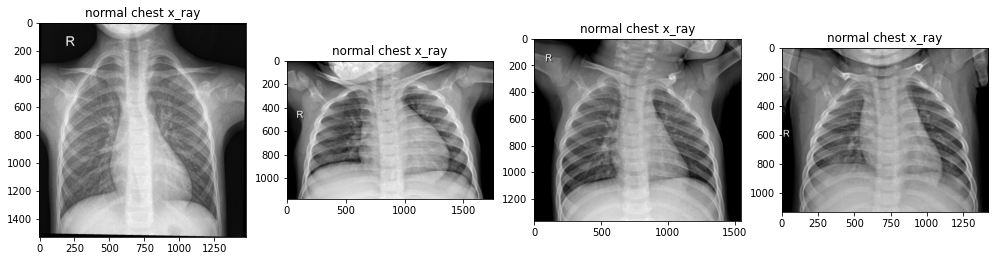

In [15]:
i=1
plt.figure(figsize=(17,14))
for image in normal_image[0:4]:
    plt.subplot(1,4,i)
    plt.title('normal chest x_ray')
    plt.imshow(imread(train_path+'/NORMAL/'+image),cmap='gray')
    i=i+1 

# 2.Pneumonic Images

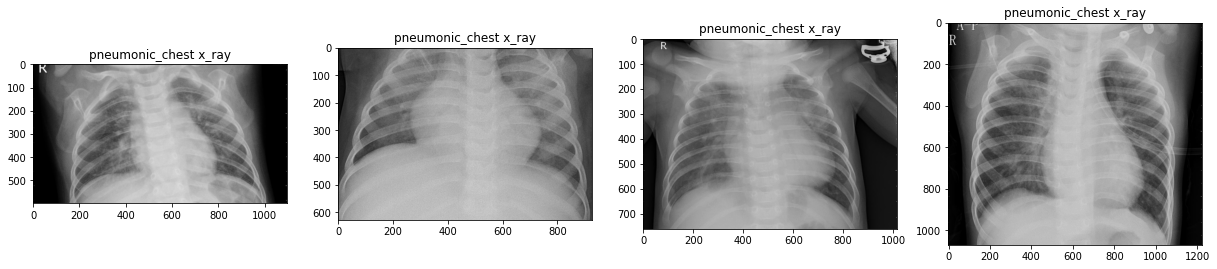

In [16]:
j=1
plt.figure(figsize=(17,14))
for image in pneumonic_image[0:4]:
    plt.subplot(2,4,j)
    plt.title('pneumonic_chest x_ray')
    plt.imshow(imread(train_path+'/PNEUMONIA/'+image),cmap='gray')
    plt.tight_layout()
    j=j+1

# No of Data in datasets

In [17]:
print('number of normal images in train set:',len(os.listdir(train_path+'/NORMAL')))
print('number of pneumoic images in train set:',len(os.listdir(train_path+'/PNEUMONIA')))

number of normal images in train set: 1342
number of pneumoic images in train set: 3876


In [18]:
print('number of normal images in test set:',len(os.listdir(test_path+'/NORMAL')))
print('number of pneumoic images in test set:',len(os.listdir(test_path+'/PNEUMONIA')))

number of normal images in test set: 234
number of pneumoic images in test set: 390


In [19]:
print('number of normal images in validation set:',len(os.listdir(val_path+'/NORMAL')))
print('number of pneumoic images in validation set:',len(os.listdir(val_path+'/PNEUMONIA')))

number of normal images in validation set: 9
number of pneumoic images in validation set: 9


# Checking the Dimensions

In [20]:
dim1=[]
dim2=[]
for image_filename in os.listdir(train_path+'/NORMAL'):
    img=imread(train_path+'/NORMAL/'+image_filename)
    print(image_filename)
    d1,d2=img.shape
    dim1.append(d1)
    dim2.append(d2)

NORMAL2-IM-0600-0001.jpeg
NORMAL2-IM-0910-0001.jpeg
NORMAL2-IM-0642-0001.jpeg
NORMAL2-IM-0526-0001.jpeg
IM-0636-0001.jpeg
IM-0225-0001.jpeg
NORMAL2-IM-0511-0001.jpeg
NORMAL2-IM-0391-0001.jpeg
NORMAL2-IM-1231-0001.jpeg
NORMAL2-IM-0976-0001.jpeg
NORMAL2-IM-0989-0001.jpeg
IM-0230-0001.jpeg
NORMAL2-IM-0887-0001.jpeg
NORMAL2-IM-1100-0001.jpeg
NORMAL2-IM-1277-0001.jpeg
IM-0320-0001.jpeg
NORMAL2-IM-0479-0001.jpeg
NORMAL2-IM-1017-0001.jpeg
NORMAL2-IM-0553-0001.jpeg
NORMAL2-IM-0536-0001.jpeg
IM-0608-0001.jpeg
IM-0598-0001.jpeg
IM-0375-0001.jpeg
NORMAL2-IM-1234-0001.jpeg
IM-0471-0001.jpeg
IM-0661-0001.jpeg
NORMAL2-IM-0810-0001.jpeg
NORMAL2-IM-0636-0001.jpeg
NORMAL2-IM-1280-0001.jpeg
NORMAL2-IM-1347-0001.jpeg
IM-0524-0001.jpeg
IM-0382-0001.jpeg
NORMAL2-IM-0637-0001.jpeg
NORMAL2-IM-0416-0001-0002.jpeg
IM-0595-0001.jpeg
IM-0449-0001.jpeg
IM-0645-0001.jpeg
IM-0479-0001.jpeg
IM-0391-0001.jpeg
NORMAL2-IM-1024-0001.jpeg
NORMAL2-IM-0741-0001.jpeg
IM-0176-0001.jpeg
NORMAL2-IM-0888-0001.jpeg
IM-0671-0001.

UnidentifiedImageError: ignored

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


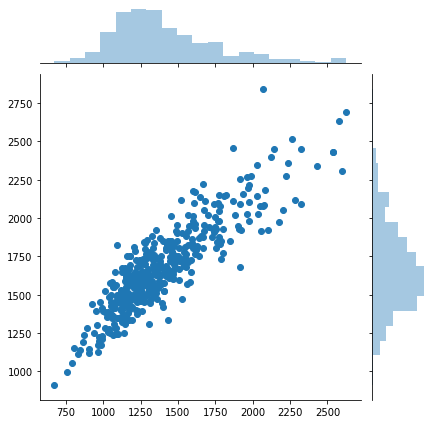

In [21]:
import seaborn as sns
sns.jointplot(dim1,dim2)

In [22]:
import numpy as np

In [23]:
print('max width:',np.max(dim1))
print('min width:',np.min(dim1))
print('max height:',np.max(dim2))
print('min height:',np.min(dim2))

max width: 2625
min width: 672
max height: 2844
min height: 912


In [24]:
print('mean of width:',np.mean(dim1))
print('mean of height:',np.mean(dim2))

mean of width: 1401.7457212713937
mean of height: 1681.880195599022


# Our input Image shape

In [28]:
image_shape=(150,150,3)

In [29]:
img=imread(train_path+'/NORMAL/'+'/IM-0533-0001.jpeg')
print("max value in image kernels:",img.max())
print("min value in image kernels:",img.min())


max value in image kernels: 255
min value in image kernels: 0


# Data Augmentation

In [30]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [31]:
image_gen=ImageDataGenerator(rotation_range=20,
                             width_shift_range=0.1,
                            height_shift_range=0.1,
                            shear_range=0.1,
                            zoom_range=0.1,
                            horizontal_flip=True,
                            fill_mode='nearest',
                            rescale=1/255)

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D,BatchNormalization,ZeroPadding2D

In [33]:
from tensorflow.keras.callbacks import EarlyStopping

# Model Building

In [34]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=image_shape, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu'))         
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())


model.add(Dense(256))
model.add(Activation('relu'))
 
    
model.add(Dense(128))
model.add(Activation('relu'))
# Dropouts help reduce overfitting by randomly turning neurons off during training.
# Here we say randomly turn off 50% of neurons.
model.add(Dropout(0.5))

# Last layer, remember its binary so we use sigmoid
model.add(Dense(1))
model.add(Activation('sigmoid'))


              

In [37]:
#from keras.optimizers import SGD

In [39]:
'''epochs =30
learning_rate = 0.1
decay_rate = learning_rate / epochs
momentum = 0.8
sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
'''

In [65]:
from keras.optimizers import Adam

In [66]:
optimizer = Adam(lr = 0.0001)

In [67]:
early_stop=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)

In [69]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy']
          )

In [70]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 82944)             0         
_________________________________________________________________
dense (Dense)                (None, 256)               21233920  
_________________________________________________________________
activation (Activation)      (None, 256)               0

In [71]:
from tensorflow.keras.callbacks import EarlyStopping

In [72]:
early_stop = EarlyStopping(monitor = "val_acc", mode="max", verbose = 2)

In [74]:
batch_size =16

In [75]:
train_image_gen = image_gen.flow_from_directory(train_path,
                                               target_size=image_shape[:2],
                                                color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary')

Found 5216 images belonging to 2 classes.


In [76]:
test_image_gen = image_gen.flow_from_directory(test_path,
                                               target_size=image_shape[:2],
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary',shuffle=False)

Found 624 images belonging to 2 classes.


In [77]:
val_image_gen = image_gen.flow_from_directory(val_path,
                                               target_size=image_shape[:2],
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary',shuffle=False)

Found 16 images belonging to 2 classes.


In [78]:
train_image_gen.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

In [79]:
val_image_gen.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

In [80]:
import warnings
warnings.filterwarnings('ignore')

In [82]:
model.fit(train_image_gen,epochs=10,
                              validation_data=test_image_gen,
                             callbacks=[early_stop])

Epoch 1/10
326/326 [==============================] - 98s 301ms/step - loss: 0.4560 - accuracy: 0.7853 - val_loss: 0.4005 - val_accuracy: 0.8301
Epoch 2/10
326/326 [==============================] - 98s 302ms/step - loss: 0.2730 - accuracy: 0.8786 - val_loss: 0.6837 - val_accuracy: 0.7228
Epoch 3/10
326/326 [==============================] - 96s 294ms/step - loss: 0.2307 - accuracy: 0.9087 - val_loss: 0.3770 - val_accuracy: 0.8542
Epoch 4/10
326/326 [==============================] - 99s 304ms/step - loss: 0.2193 - accuracy: 0.9149 - val_loss: 0.4677 - val_accuracy: 0.8125
Epoch 5/10
326/326 [==============================] - 95s 292ms/step - loss: 0.2040 - accuracy: 0.9208 - val_loss: 0.3817 - val_accuracy: 0.8510
Epoch 6/10
326/326 [==============================] - 98s 302ms/step - loss: 0.2040 - accuracy: 0.9216 - val_loss: 0.4935 - val_accuracy: 0.8029
Epoch 7/10
326/326 [==============================] - 98s 301ms/step - loss: 0.1940 - accuracy: 0.9247 - val_loss: 0.4002 - val_ac

In [83]:
losses = pd.DataFrame(model.history.history)
losses

,loss,accuracy,val_loss,val_accuracy
0,0.455962,0.785276,0.400487,0.830128
1,0.272990,0.878643,0.683710,0.722756
2,0.230743,0.908742,0.377019,0.854167
3,0.219287,0.914877,0.467675,0.812500
4,0.203999,0.920821,0.381667,0.850962
5,0.204014,0.921587,0.493527,0.802885
6,0.193967,0.924655,0.400244,0.842949
7,0.180305,0.930215,0.433792,0.842949
8,0.180822,0.931557,0.439229,0.828526
9,0.177053,0.929256,0.672035,0.766026


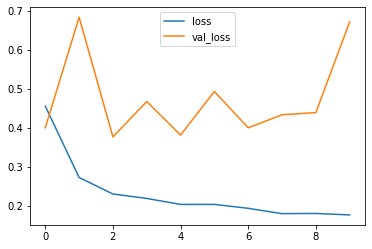

In [84]:
losses[['loss','val_loss']].plot()

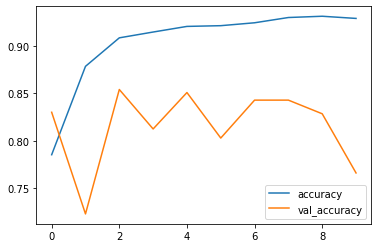

In [85]:
losses[['accuracy','val_accuracy']].plot()

In [87]:
model.evaluate(test_image_gen)

39/39 [==============================] - 9s 221ms/step - loss: 0.7077 - accuracy: 0.7580


[0.7076956629753113, 0.7580128312110901]

In [88]:
pred=model.predict(test_image_gen)

In [89]:
predictions=pred > 0.5

In [90]:
from sklearn.metrics import classification_report,confusion_matrix

In [91]:
print(classification_report(test_image_gen.classes,predictions))    

              precision    recall  f1-score   support

           0       0.99      0.33      0.49       234
           1       0.71      1.00      0.83       390

    accuracy                           0.75       624
   macro avg       0.85      0.66      0.66       624
weighted avg       0.82      0.75      0.70       624



In [92]:
print(confusion_matrix(test_image_gen.classes,predictions))

[[ 77 157]
 [  1 389]]


# Tuning the CNN  using Keras Tuner

In [93]:
import tensorflow as tf
from tensorflow import keras

In [94]:
def build_model(hp):
    model2=keras.Sequential([
        keras.layers.Conv2D(
        filters=hp.Int('conv_1_filter',min_value=32,max_value=256,step=16),
        kernel_size=hp.Choice('conv_1_kernel',values=[3,5]),
        activation='relu',
        input_shape=image_shape
        ),
        
        keras.layers.MaxPooling2D(pool_size=(3, 3)),
        
        keras.layers.Conv2D(
        filters=hp.Int('conv_2_filter',min_value=32,max_value=256,step=16),
        kernel_size=hp.Choice('conv_2_kernel',values=[3,5]),
        activation='relu',
        ),
        
        keras.layers.MaxPooling2D(pool_size=(3, 3)),
        
        keras.layers.Conv2D(
        filters=hp.Int('conv_3_filter',min_value=32,max_value=256,step=16),
        kernel_size=hp.Choice('conv_3_kernel',values=[3,5]),
        activation='relu',
        ),
        
        keras.layers.MaxPooling2D(pool_size=(3, 3)),
         
        keras.layers.Flatten(),
        
        keras.layers.Dense(
        units=hp.Int('dens_1_units',min_value=32,max_value=256,step=16),
        activation='relu'
        ),
        
        keras.layers.Dense(1,activation='sigmoid')
        
    ])
    
    model2.compile(keras.optimizers.Adam(hp.Choice('learning_rate',values=[1e-2,1e-3])),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    
    return model2

In [95]:
!pip install keras-tuner

     |████████████████████████████████| 61kB 1.8MB/s 
  Created wheel for keras-tuner: filename=keras_tuner-1.0.1-cp36-none-any.whl size=73200 sha256=95b3c602d79bcc7b6462a369fac973a93cb2b39eb30b3b2394b0ee8d86565d1c
  Stored in directory: /root/.cache/pip/wheels/b9/cc/62/52716b70dd90f3db12519233c3a93a5360bc672da1a10ded43
  Created wheel for terminaltables: filename=terminaltables-3.1.0-cp36-none-any.whl size=15356 sha256=73b5bba7159af791170d1ba3447a12bec14542a7bbab8a2b156cdddf0fde46d3
  Stored in directory: /root/.cache/pip/wheels/30/6b/50/6c75775b681fb36cdfac7f19799888ef9d8813aff9e379663e
Successfully built keras-tuner terminaltables


In [96]:
from kerastuner import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters

In [97]:
tuner_search=RandomSearch(build_model,
                          objective='val_accuracy',
                          max_trials=6,directory='output',
                          project_name='chest_xray')

In [99]:
tuner_search.search(train_image_gen,validation_data=test_image_gen,epochs=3)

Epoch 1/3
326/326 [==============================] - 96s 294ms/step - loss: 0.4340 - accuracy: 0.8050 - val_loss: 0.8248 - val_accuracy: 0.6763
Epoch 2/3
326/326 [==============================] - 94s 289ms/step - loss: 0.2515 - accuracy: 0.8997 - val_loss: 0.4956 - val_accuracy: 0.7756
Epoch 3/3
326/326 [==============================] - 93s 286ms/step - loss: 0.2079 - accuracy: 0.9172 - val_loss: 0.5125 - val_accuracy: 0.7628


Epoch 1/3
326/326 [==============================] - 99s 303ms/step - loss: 1.3565 - accuracy: 0.7318 - val_loss: 0.6697 - val_accuracy: 0.6250
Epoch 2/3
326/326 [==============================] - 99s 303ms/step - loss: 0.5735 - accuracy: 0.7429 - val_loss: 0.6974 - val_accuracy: 0.6250
Epoch 3/3
326/326 [==============================] - 99s 305ms/step - loss: 0.5711 - accuracy: 0.7429 - val_loss: 0.7091 - val_accuracy: 0.6250


Epoch 1/3
326/326 [==============================] - 100s 306ms/step - loss: 0.4671 - accuracy: 0.7945 - val_loss: 0.4218 - val_accuracy: 0.8077
Epoch 2/3
326/326 [==============================] - 100s 305ms/step - loss: 0.2490 - accuracy: 0.8947 - val_loss: 0.4533 - val_accuracy: 0.8173
Epoch 3/3
326/326 [==============================] - 100s 308ms/step - loss: 0.2339 - accuracy: 0.9045 - val_loss: 0.4366 - val_accuracy: 0.8077


Epoch 1/3
326/326 [==============================] - 94s 289ms/step - loss: 0.4591 - accuracy: 0.7947 - val_loss: 0.6270 - val_accuracy: 0.7356
Epoch 2/3
326/326 [==============================] - 93s 285ms/step - loss: 0.2572 - accuracy: 0.8951 - val_loss: 0.7364 - val_accuracy: 0.7356
Epoch 3/3
326/326 [==============================] - 93s 286ms/step - loss: 0.2060 - accuracy: 0.9162 - val_loss: 0.6350 - val_accuracy: 0.7804


Epoch 1/3
326/326 [==============================] - 93s 287ms/step - loss: 0.4599 - accuracy: 0.8004 - val_loss: 0.4579 - val_accuracy: 0.7772
Epoch 2/3
326/326 [==============================] - 94s 288ms/step - loss: 0.2786 - accuracy: 0.8809 - val_loss: 0.7833 - val_accuracy: 0.7372
Epoch 3/3
326/326 [==============================] - 93s 285ms/step - loss: 0.2483 - accuracy: 0.9020 - val_loss: 0.6453 - val_accuracy: 0.7564


Epoch 1/3
326/326 [==============================] - 97s 298ms/step - loss: 0.5264 - accuracy: 0.7636 - val_loss: 0.5876 - val_accuracy: 0.6955
Epoch 2/3
326/326 [==============================] - 97s 297ms/step - loss: 0.3676 - accuracy: 0.8399 - val_loss: 0.6609 - val_accuracy: 0.7115
Epoch 3/3
326/326 [==============================] - 96s 296ms/step - loss: 0.2604 - accuracy: 0.8913 - val_loss: 0.5595 - val_accuracy: 0.7740


INFO:tensorflow:Oracle triggered exit


In [100]:
model2=tuner_search.get_best_models(num_models=1)[0]
model2

In [101]:
model2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 224)     6272      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 224)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 47, 192)       387264    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 192)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 144)       248976    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 144)         0         
_________________________________________________________________
flatten (Flatten)            (None, 2304)              0

In [102]:
model2.fit(train_image_gen,validation_data=test_image_gen,epochs=10,initial_epoch=3)

Epoch 4/10
326/326 [==============================] - 101s 309ms/step - loss: 0.2296 - accuracy: 0.9099 - val_loss: 0.6693 - val_accuracy: 0.7532
Epoch 5/10
326/326 [==============================] - 100s 307ms/step - loss: 0.2120 - accuracy: 0.9166 - val_loss: 0.5465 - val_accuracy: 0.7885
Epoch 6/10
326/326 [==============================] - 100s 305ms/step - loss: 0.1870 - accuracy: 0.9283 - val_loss: 0.5924 - val_accuracy: 0.7756
Epoch 7/10
326/326 [==============================] - 99s 305ms/step - loss: 0.1886 - accuracy: 0.9248 - val_loss: 0.3988 - val_accuracy: 0.8478
Epoch 8/10
326/326 [==============================] - 99s 304ms/step - loss: 0.1716 - accuracy: 0.9300 - val_loss: 0.4930 - val_accuracy: 0.8045
Epoch 9/10
326/326 [==============================] - 100s 306ms/step - loss: 0.1653 - accuracy: 0.9339 - val_loss: 0.6620 - val_accuracy: 0.8061
Epoch 10/10
326/326 [==============================] - 99s 303ms/step - loss: 0.1516 - accuracy: 0.9411 - val_loss: 0.4686 - v

In [103]:
losses2 = pd.DataFrame(model2.history.history)
losses2

,loss,accuracy,val_loss,val_accuracy
0,0.229619,0.909893,0.669345,0.753205
1,0.212004,0.916603,0.546478,0.788462
2,0.186998,0.928298,0.592434,0.775641
3,0.188574,0.924847,0.398826,0.847756
4,0.171635,0.930023,0.492998,0.804487
5,0.165306,0.933857,0.661997,0.806090
6,0.151585,0.941143,0.468586,0.825321


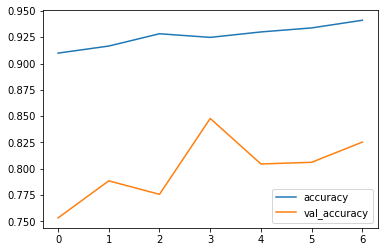

In [104]:
losses2[['accuracy','val_accuracy']].plot()

In [106]:
pred2=model2.predict(test_image_gen)

In [107]:
prediction2=pred2 > 0.5

In [108]:
from sklearn.metrics import classification_report,confusion_matrix

In [109]:
print(classification_report(test_image_gen.classes,prediction2))

              precision    recall  f1-score   support

           0       0.95      0.59      0.73       234
           1       0.80      0.98      0.88       390

    accuracy                           0.83       624
   macro avg       0.87      0.78      0.80       624
weighted avg       0.85      0.83      0.82       624



In [110]:
print(confusion_matrix(test_image_gen.classes,prediction2))

[[138  96]
 [  8 382]]


In [111]:
from tensorflow.keras.models import load_model

In [113]:
model2.save('model2.h5')

In [114]:
import pickle


In [115]:
pickle.dump(model2,open('model2.pkl','wb'))

TypeError: ignored